<a href="https://colab.research.google.com/github/mqquiroz/easywave/blob/main/Easywave_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install basemap
!wget https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
!tar -xzf easywave_r34_src.tar.gz?inline=false
!rm easywave_r34_src.tar.gz\?inline\=false
%cd easywave/
!./configure
!make
!make install
%cd /usr/local/easywave/bin/
!chmod +x easywave
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd /content/
!rm -r easywave
#!git clone https://git.gfz-potsdam.de/id2/geoperil/easyWave.git
#%cd easyWave/bin/r34/
#!tar -xzf easywave_r34_src.tar.gz
#%cd easywave/
#!./configure
#!make
#!make install
#%cd /usr/local/easywave/bin/
#!chmod +x easywave
#import os
#cwd = os.getcwd()
#os.environ['PATH'] += ":"+cwd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-11-13 00:47:46--  https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
Resolving git.gfz-potsdam.de (git.gfz-potsdam.de)... 139.17.228.166
Connecting to git.gfz-potsdam.de (git.gfz-potsdam.de)|139.17.228.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3995705 (3.8M) [application/x-gzip]
Saving to: ‘easywave_r34_src.tar.gz?inline=false’

easywave_r34_src.ta 100%[===================>]   3.81M  3.59MB/s    in 1.1s    

2022-11-13 00:47:48 (3.59 MB/s) - ‘easywave_r34_src.tar.gz?inline=false’ saved [3995705/3995705]

/content/easywave
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether m

In [3]:
!wget https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/data/examples.tar.gz?inline=false
!tar -xzf examples.tar.gz?inline=false
!rm examples.tar.gz?inline=false

--2022-11-13 00:48:05--  https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/data/examples.tar.gz?inline=false
Resolving git.gfz-potsdam.de (git.gfz-potsdam.de)... 139.17.228.166
Connecting to git.gfz-potsdam.de (git.gfz-potsdam.de)|139.17.228.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48632405 (46M) [application/x-gzip]
Saving to: ‘examples.tar.gz?inline=false’

examples.tar.gz?inl 100%[===================>]  46.38M  11.4MB/s    in 4.5s    

2022-11-13 00:48:11 (10.3 MB/s) - ‘examples.tar.gz?inline=false’ saved [48632405/48632405]



In [4]:
!mkdir simulacion
%cd simulacion
!easywave -grid /content/examples/e2Asean.grd -source /content/examples/BengkuluSept2007.flt -time 120
!wget https://raw.githubusercontent.com/mqquiroz/easywave/main/functions_easywave.py

mkdir: cannot create directory ‘simulacion’: File exists
/content/simulacion

easyWave ver.2013-04-11
Model time = 00:00:00,   elapsed: 0 msec
Model time = 00:10:00,   elapsed: 19 msec
Model time = 00:20:00,   elapsed: 58 msec
Model time = 00:30:00,   elapsed: 119 msec
Model time = 00:40:00,   elapsed: 210 msec
Model time = 00:50:00,   elapsed: 363 msec
Model time = 01:00:00,   elapsed: 596 msec
Model time = 01:10:00,   elapsed: 884 msec
Model time = 01:20:00,   elapsed: 1263 msec
Model time = 01:30:00,   elapsed: 1796 msec
Model time = 01:40:00,   elapsed: 2440 msec
Model time = 01:50:00,   elapsed: 3294 msec
Model time = 02:00:00,   elapsed: 4260 msec
--2022-11-13 00:48:23--  https://raw.githubusercontent.com/mqquiroz/easywave/main/functions_easywave.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP requ

In [32]:
from functions_easywave import ew2py
from functions_easywave import load_surfer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.interpolate

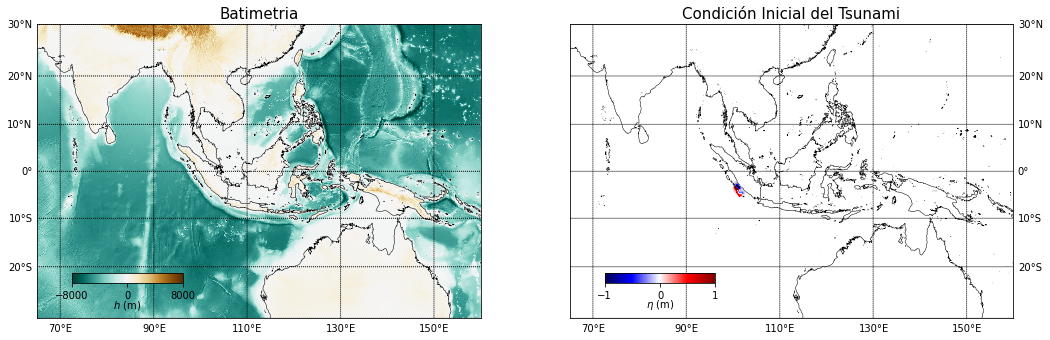

In [63]:
#Batimetria
lon_x, lat_y, grd, (ny,nx) =load_surfer('/content/examples/e2Asean.grd')
lon_x=lon_x.reshape(ny,nx)
lat_y=lat_y.reshape(ny,nx)
grid=grd.reshape(ny,nx)

alto = 12.5
ancho = 17.5
fig = plt.figure(figsize=(ancho,alto))

ax = fig.add_subplot(121)
m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=20,resolution='c')
lon_xm,lat_ym = m(lon_x,lat_y)

my_cmap = plt.cm.BrBG_r
cs = m.pcolormesh(lon_xm,lat_ym,grid,cmap = my_cmap,vmin=-8000,vmax=8000)
m.contour(lon_xm,lat_ym,grid,levels=[0],colors='k',linewidths=0.5)
m.drawparallels(np.arange(-30,30+10,10),labels=[1,0,0,0])
m.drawmeridians(np.arange(70,160+20,20),labels=[0,0,0,1])
cbaxes = inset_axes(ax, width="25%", height="3.5%",borderpad=3.5, loc=3) 
cbar = fig.colorbar(cs, cax=cbaxes, ticks=[-8000,0,8000], orientation='horizontal')
cbar.set_label(r'$h$ (m)',fontsize=10, ha='center', va='center')
ax.set_title('Batimetria',fontsize=15)


#Condición Inicial
fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)
lon, lat = np.meshgrid(lon, lat)


h0_interp = scipy.interpolate.griddata((lon.flatten(),lat.flatten()),h0.flatten() , (lon_x,lat_y),method='linear')

m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=20,resolution='c')

ax = fig.add_subplot(122)
cmap2=plt.cm.seismic

m.contour(lon_xm,lat_ym,grid,0,colors='k',linewidths=0.5)
cond_ini = m.pcolormesh(lon_xm,lat_ym,h0_interp,cmap=cmap2,vmin=-1.0,vmax=1.0)
m.drawparallels(np.arange(-30,30+10,10),labels=[0,1,0,0])
m.drawmeridians(np.arange(70,160+20,20),labels=[0,0,0,1])

cbaxes = inset_axes(ax, width="25%", height="3.5%",borderpad=3.5, loc=3) 
cbar = fig.colorbar(cond_ini, cax=cbaxes, ticks=[-1,0,1], orientation='horizontal')
cbar.set_label(r'$\eta$ (m)',fontsize=10, ha='center', va='center')
ax.set_title('Condición Inicial del Tsunami',fontsize=15)

plt.show()

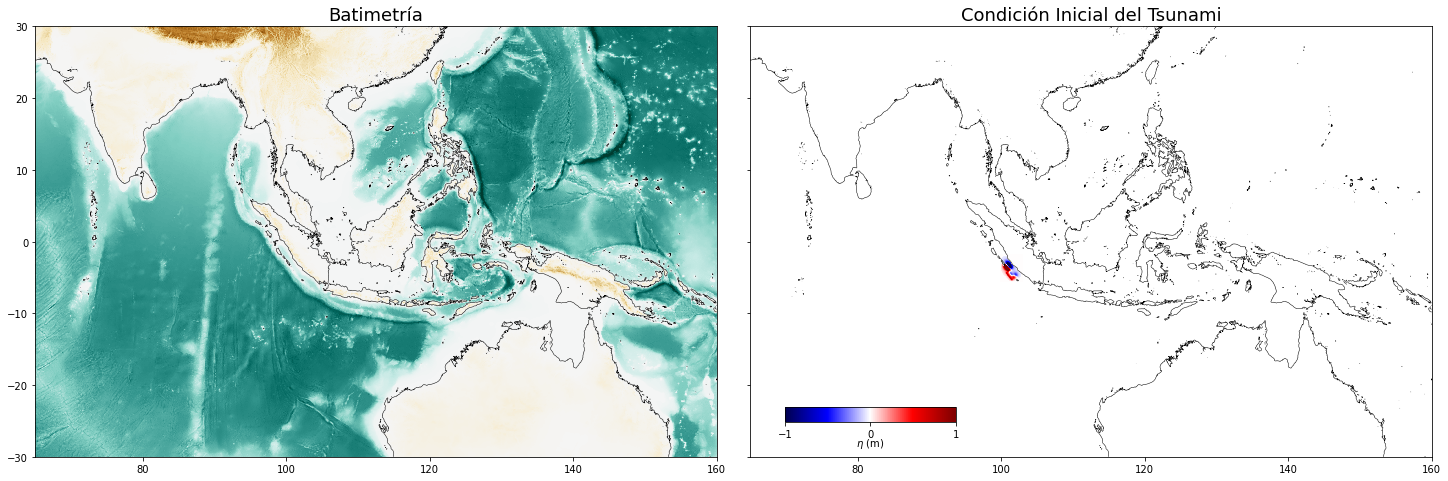

In [64]:
#Batimetria

lon_x, lat_y, grd, (ny,nx) =load_surfer('/content/examples/e2Asean.grd')
lon_x=lon_x.reshape(ny,nx)
lat_y=lat_y.reshape(ny,nx)
grid=grd.reshape(ny,nx)

alto = 15
ancho = 20
fig, ax = plt.subplots(1,2,figsize=(ancho,alto),sharey=True,constrained_layout=True)

#grilla
#plt.contour(lon_x,lat_y,grid,0,colors='k')
cmap=plt.cm.BrBG_r#gist_earth
ax[0].pcolormesh(lon_x,lat_y,grid,cmap=cmap,vmin=-8000,vmax=8000)
ax[0].contour(lon_x,lat_y,grid,levels=[0],colors='k',linewidths=0.5)
ax[0].set_title('Batimetría',fontsize=18)
ax[0].set_aspect('equal')


#Condición Inicial
fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)

cmap2=plt.cm.seismic
ax[1].contour(lon_x,lat_y,grid,0,colors='k',linewidths=0.5)
cond_ini = ax[1].pcolormesh(lon,lat,h0[:-1,:-1],cmap=cmap2,vmin=-1.0,vmax=1.0)
ax[1].set_title('Condición Inicial del Tsunami',fontsize=18)


cbaxes = inset_axes(ax[1], width="25%", height="3.5%",borderpad=3.5, loc=3) 
cbar = fig.colorbar(cond_ini, cax=cbaxes, ticks=[-1,0,1], orientation='horizontal')
cbar.set_label(r'$\eta$ (m)',fontsize=10, ha='center', va='center')


##plt.ylim(-38,-22)
##plt.xlim(-85,-68)
ax[1].set_aspect('equal')
#plt.grid()
#plt.show()

plt.show()

In [65]:
def file_netcdf(name,grid,descripcion,dt,ttotal): # name 'sample.nc', grid:'/content/examples/e2Asean.grd', descripcion: "Simulacion MQ1"
  import numpy as np
  import netCDF4 as nc4
  from scipy.interpolate import griddata
  from scipy.interpolate import RegularGridInterpolator
  lon_x, lat_y, grd, (ny,nx) =load_surfer(grid)
  lon_x=lon_x.reshape(ny,nx)
  lat_y=lat_y.reshape(ny,nx)
  grid=grd.reshape(ny,nx)
  t = np.arange(0,ttotal+dt,dt)
  pasos = int(ttotal/dt)+1

  f = nc4.Dataset(name,'w', format='NETCDF4') #'w' stands for write
  f.createDimension('lon',nx)
  f.createDimension('lat',ny)
  f.createDimension('time',pasos)

  longitude = f.createVariable('Longitude', 'f4', 'lon')
  latitude = f.createVariable('Latitude', 'f4', 'lat')  
  time = f.createVariable('Time', 'i4', 'time')
  ssh = f.createVariable('SSH', 'f4', ('time', 'lat' , 'lon'))

  longitude[:] = lon_x[0,:]
  latitude[:]  = lat_y[:,0]
  time[:] = t
  lon_lat = [latitude[:],longitude[:]]
  print([longitude[:], latitude[:]])

  #Add global attributes
  f.description = descripcion
  #Add local attributes to variable instances
  longitude.units = 'degrees'
  latitude.units = 'degrees'
  time.units = 'minutes'
  ssh.units = 'meters'

  for i in range(0,pasos):
    fileName= 'eWave.2D.{0:05d}.ssh'.format(i*60*dt)
    lon, lat, h0 = ew2py(fileName)
    interp = RegularGridInterpolator((lat, lon), h0,bounds_error=False, fill_value=None)
    data = interp(lon_lat)
    #ssh[i,:,:] = data
  
  f.close
  return f


In [68]:
data = file_netcdf('sim1.nc','/content/examples/e2Asean.grd','Simulacion MQ',5,120)

[masked_array(data=[ 65.     ,  65.03334,  65.06668, ..., 159.95001,
                   159.98335, 160.0167 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32), masked_array(data=[-30.      , -29.966658, -29.933315, ...,  29.949993,
                    29.983335,  30.016678],
             mask=False,
       fill_value=1e+20,
            dtype=float32)]


ValueError: ignored

In [ ]:
%cd simulacion/

import pygmt
from functions_easywave import ew2py
from functions_easywave import load_surfer
import numpy as np
import matplotlib.pyplot as plt
#pygmt.show_versions()

#fig = pygmt.Figure()
#fig.coast(region=[0, 360, -80, 80], projection="M0/0/10c", frame="a30fg", shorelines=0.5)
#fig.show()

fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)

fig = pygmt.Figure()
fig.grdimage(grid=h0[:-1,:-1], cmap="vik", projection="R15c", frame=True)
fig.show()

/content/simulacion


GMTInvalidInput: ignored

In [ ]:
int(10/2)

5